In [1]:
from astropy.io import fits
from astropy.table import Table
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
event_ids = ['run0001_ID000017','run0001_ID000023','run0001_ID000362','run0002_ID000044','run0002_ID000186',
             'run0003_ID000378','run0004_ID000002','run0004_ID000102','run0004_ID000339','run0004_ID000386',
             'run0004_ID000387','run0004_ID000390','run0005_ID000198','run0005_ID000225','run0006_ID000053',
             'run0006_ID000247','run0007_ID000072','run0007_ID000241','run0008_ID000225','run0008_ID000262',
             'run0008_ID000397','run0009_ID000171','run0009_ID000191']
not_cov=['run0001_ID000017','run0002_ID000044','run0004_ID000386','run0005_ID000198','run0008_ID000397']

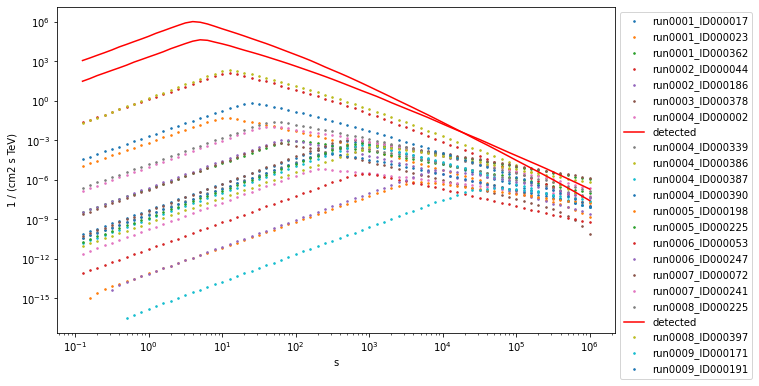

In [3]:
plt.figure(figsize=(10,6))
for ID in event_ids:
    hdul = fits.open(f'/home/dell/tesi_GW/fits/{ID}.fits') 
    grb_Eval=[]
    # reading Energy from Lara's files. 
    grb_Eval     = Table.read(hdul,hdu=1)["Energies"].quantity
    #print (grb_Eval[0])
    # GeV to Tev conversion
    grb_Eval     = grb_Eval.to(u.TeV)
    #print (grb_Eval[0])
    grb_tval=[]
    # reading time intervals form Lara's files
    grb_tval = Table.read(hdul,hdu=2)["Final Time"].quantity 
    flux=[]
    # reading flux form Lara's files:
    # unabsorbed flux, by now will not be considered as a problem: sources are 
    # closeby and than only mildly absorbed
    flux = Table.read(hdul,hdu=3)
    # column number - energy
    icol_E  = len(flux.colnames)   
    # row number - time
    jrow_t  = len(flux[flux.colnames[0]])    
    magnify= 1e3       # needed to convert flux from 1/GeV to 1/TeV
    flux_unit = u.Unit("1 /(cm2 TeV s)")
    # Grb fluxval must have the dimension of time x energy, 
    # the same as flux in this case
    # ----------------------  TRUE
    grb_fluxval = np.zeros( (jrow_t,icol_E) )*flux_unit
    #print(grb_fluxval.shape)
    for i in range(0,icol_E):
        for j in range(0,jrow_t):
            f = flux[j][i] 
            grb_fluxval[j][i] = magnify*f*flux_unit 
    # ----------------------        
    F = [] 
    for j in range(0,jrow_t):
        F.append(np.sum(grb_fluxval[j,:].value)) ## Sommo sui bin energetici
    
    if ID=='run0004_ID000102' or ID=='run0008_ID000262':
         plt.plot(grb_tval.value,F,color='red', label='detected')
    else:
        plt.scatter(grb_tval.value,F,label=ID,s=10,marker='.')
    plt.xlabel(grb_tval.unit)
    plt.ylabel(flux_unit)
    plt.xscale('log');
    plt.yscale('log');
    plt.legend(bbox_to_anchor=(1, 1))
    

In [4]:
obs_times=[11.63,9.83,15.11,3.46,13.26,0.07,4.05,21.05,0.07,16.64,19.81,22.15,
           7.30,12.54,2.22,39.64,17.20,12.54,0.50,19.56,0.07,10.00,5.22]*u.h

In [5]:
np.max(obs_times)

<Quantity 39.64 h>

(array([6., 3., 3., 4., 4., 2., 0., 0., 0., 1.]),
 array([   252. ,  14497.2,  28742.4,  42987.6,  57232.8,  71478. ,
         85723.2,  99968.4, 114213.6, 128458.8, 142704. ]),
 <BarContainer object of 10 artists>)

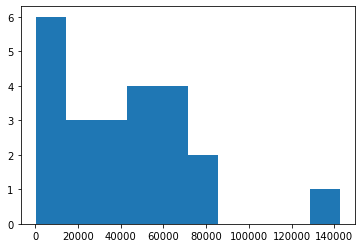

In [6]:
plt.hist(obs_times.to(u.s).value)

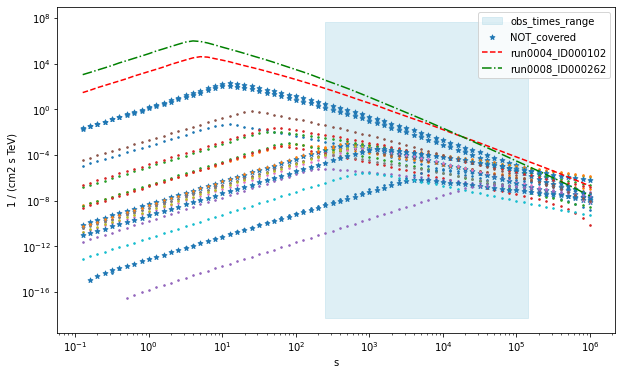

In [41]:
plt.figure(figsize=(10,6))
plt.fill_between([np.min(obs_times.to(u.s).value),np.max(obs_times.to(u.s).value)],5e-19,5e7, color='lightblue',
                  alpha=0.4, label= 'obs_times_range'
                     )
for ii,ID in enumerate(event_ids):
    hdul = fits.open(f'/home/dell/tesi_GW/fits/{ID}.fits') 
    grb_Eval=[]
    # reading Energy from Lara's files. 
    grb_Eval     = Table.read(hdul,hdu=1)["Energies"].quantity
    #print (grb_Eval[0])
    # GeV to Tev conversion
    grb_Eval     = grb_Eval.to(u.TeV)
    #print (grb_Eval[0])
    grb_tval=[]
    # reading time intervals form Lara's files
    grb_tval = Table.read(hdul,hdu=2)["Final Time"].quantity 
    flux=[]
    # reading flux form Lara's files:
    # unabsorbed flux, by now will not be considered as a problem: sources are 
    # closeby and than only mildly absorbed
    flux = Table.read(hdul,hdu=3)
    # column number - energy
    icol_E  = len(flux.colnames)   
    # row number - time
    jrow_t  = len(flux[flux.colnames[0]])    
    magnify= 1e3       # needed to convert flux from 1/GeV to 1/TeV
    flux_unit = u.Unit("1 /(cm2 TeV s)")
    # Grb fluxval must have the dimension of time x energy, 
    # the same as flux in this case
    # ----------------------  TRUE
    grb_fluxval = np.zeros( (jrow_t,icol_E) )*flux_unit
    #print(grb_fluxval.shape)
    for i in range(0,icol_E):
        for j in range(0,jrow_t):
            f = flux[j][i] 
            grb_fluxval[j][i] = magnify*f*flux_unit 
    # ----------------------        
    F = [] 
    for j in range(0,jrow_t):
        F.append(np.sum(grb_fluxval[j,:].value)) ## Sommo sui bin energetici
    F=np.asarray(F)
    #print(np.min(F))
    if ID=='run0004_ID000102' :   
        plt.plot(grb_tval.value,F,color='red', label='run0004_ID000102',linestyle='--')
        #plt.vlines(obs_times.to(u.s)[ii].value,5e-19,5e7 , color= 'red' ,linestyle='-.')
    elif ID=='run0008_ID000262':
        plt.plot(grb_tval.value,F,color='green', label='run0008_ID000262',linestyle='-.')
        #plt.vlines(obs_times.to(u.s)[ii].value,5e-19,5e7 , color= 'green' ,linestyle='-.')
    elif ID in not_cov:
        for j in range(len(F)):
            if F[j] > 0.0: 
                plt.scatter(grb_tval.value[j],F[j],color='tab:blue', label='NOT_covered',marker='*',s=25)
        #plt.annotate()
    else:
        plt.scatter(grb_tval.value,F,s=10,marker='.')
    plt.xlabel(grb_tval.unit)
    plt.ylabel(flux_unit)
    plt.xscale('log');
    plt.yscale('log');
    plt.legend(bbox_to_anchor=(1, 1))
    
    plt.xlabel(grb_tval.unit)
    plt.ylabel(flux_unit)
    plt.xscale('log');
    plt.yscale('log');
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #plt.xlim(0.2,1.2e6)